In [83]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bioinfokit.visuz import cluster
from statsmodels.graphics.mosaicplot import mosaic
import sys
import seaborn as sns
plt.style.use(["science", "notebook", "grid"])

# print versions
print('numpy version: ', np.__version__)
print('pandas version: ', pd.__version__)
print("Matplotlib  version: ", plt.matplotlib.__version__)
print('Python version: ', sys.version)

numpy version:  1.24.3
pandas version:  2.0.1
Matplotlib  version:  3.7.1
Python version:  3.11.3 (v3.11.3:f3909b8bc8, Apr  4 2023, 20:12:10) [Clang 13.0.0 (clang-1300.0.29.30)]


## Step 1: Getting the dataset
 The dataset was collected from the provide link to the dataset and was read directly  from the webserver using `Pandas's` inbuilt functionality. The dataset was not stored locally to avoid clashes in file path and to avoid the need to upload the dataset to the cloud server.   
 The first 3 rows of the dataset was displayed to get a feel of the dataset and to understand the features of the dataset.


In [84]:
url = "https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv" # Data url
data_original = pd.read_csv(url)

# Get the dataset head
data_original.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


As we can see from the output, the first respondent believes that McDonald’s is not yummy, convenient, not spicy, fattening, not greasy, fast, cheap, not tasty, expensive, not healthy and not disgusting. This same respondent does not like McDonald’s (rating of −3), is 61 years old, eats at McDonald’s every three months and is female.
This quick glance at the data shows that the segmentation variables (perception of McDonald’s) are verbal, not numeric. This means that they are coded using the words YES and NO. This is not a suitable format for segment extraction. We need numbers, not words. To get numbers, we store the segmentation variables in a separate matrix, and convert them from verbal YES/NO to numeric binary.

## Step 2:
1. Extract the first 11 columns of the dataset becauset hese columns contain the segmentation values, and we convert the data into a matrix.
2. We identify all **YES** ebtries in the matrix and replace them with **1** and all **NO** entries with **0**.
3. Check the transformed data correctly by inspecting the average value of each transformed segmentation column

In [85]:
# Get the first 11 columns
data = data.iloc[:, :11] # indexing starts at 0. 0:11 means 0 to 10

# Convert the boolean values to 0 and 1
data.replace(to_replace=['No', 'Yes'], value=[0, 1], inplace=True)

# Get the average of each column in the dataset
data.mean()

yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64

The average values of the transformed binary numeric segmentation variables indicate that about half of the respondents (55%) perceive McDonald’s as YUMMY, 91% believe that eating at McDonald’s is CONVENIENT, but only 9% think that McDonald’s food is SPICY.

## Step 3: Performing PCA Analysis
A perceptual map offers initial insights into how attributes are rated by respondents and, importantly, which attributes tend to be rated in the same way. Principal components analysis is not computed to reduce the number of variables. This approach – also referred to as factor-cluster analysis – is inferior to clustering raw data in most instances (Dolnicar and Grün 2008). Here, we calculate principal components because we use the resulting components to rotate and project the data for the perceptual map. We use unstandardised data because our segmentation variables are all binary.

In [86]:
# Import PCA Package
from sklearn.decomposition import PCA

# Perform the PCA analaysis
pca = PCA()
pca_data = pca.fit_transform(data)

# Cumulative Variance explains
var_cum = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
# Names of the PCA columns
names = ['PC' + str(i) for i in range(1, 12)]
# Create a dataframe with the PCA data
pca_df = pd.DataFrame(pca_data, columns=names)

# PCA_components
pca_comp = pd.DataFrame(pca.components_, columns=names, index=data.columns)

In [87]:
## Print the PCA results
delimiter = "\n" + "="*100 + "\n"
print("Explained Variance Ratio of PCA components: ", pca.explained_variance_ratio_)
print(delimiter)
print("Cumulative Variance Explained by PCA components: ", var_cum)
print(delimiter)
print("PCA Components: ")
pca_comp

Explained Variance Ratio of PCA components:  [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


Cumulative Variance Explained by PCA components:  [29.94 49.22 62.52 70.83 76.78 81.81 86.19 90.14 93.82 97.06 99.99]


PCA Components: 


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.476933,-0.155332,-0.006356,0.116232,0.304443,-0.108493,-0.337186,-0.471514,0.329042,-0.213711,0.374753
convenient,0.363790,0.016414,0.018809,-0.034094,-0.063839,-0.086972,-0.610633,0.307318,0.601286,0.076593,-0.139656
spicy,-0.304444,-0.062515,-0.037019,-0.322359,-0.802373,-0.064642,-0.149310,-0.287265,0.024397,0.192051,-0.088571
fattening,0.055162,-0.142425,0.197619,-0.354139,0.253960,-0.097363,0.118958,-0.002547,0.067816,0.763488,0.369539
greasy,-0.307535,0.277608,0.070620,-0.073405,0.361399,0.107930,-0.128973,-0.210899,-0.003125,0.287846,-0.729209
fast,0.170738,-0.347830,-0.355087,-0.406515,0.209347,-0.594632,-0.103241,-0.076914,-0.261342,-0.178226,-0.210878
cheap,-0.280519,-0.059738,0.707637,-0.385943,0.036170,-0.086846,-0.040449,0.360453,-0.068385,-0.349616,-0.026792
tasty,0.013041,-0.113079,0.375934,0.589622,-0.138241,-0.627799,0.140060,-0.072792,0.029539,0.176303,-0.167181
expensive,0.572403,-0.018465,0.400280,-0.160512,-0.002847,0.166197,0.076069,-0.639086,0.066996,-0.185572,-0.072483
healthy,-0.110284,-0.665818,-0.075634,-0.005338,0.008707,0.239532,0.428087,0.079184,0.454399,-0.038117,-0.289592


In [88]:
print("PCA Standard Deviation: ", pca.explained_variance_**0.5)
print(delimiter)
print("Transformed data after PCA")
pca_df

PCA Standard Deviation:  [0.75704952 0.60745556 0.50461946 0.39879859 0.33740501 0.31027461
 0.28969732 0.27512196 0.2652511  0.24884182 0.23690284]


Transformed data after PCA


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [89]:
# correlation coefficient between original variables and the component
loadings = pca.components_
pc_list = ["PC"+str(idx) for idx in list(range(1, pca.n_features_in_+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['feature'] = data.columns.values
loadings_df = loadings_df.set_index('feature')

<Axes: >

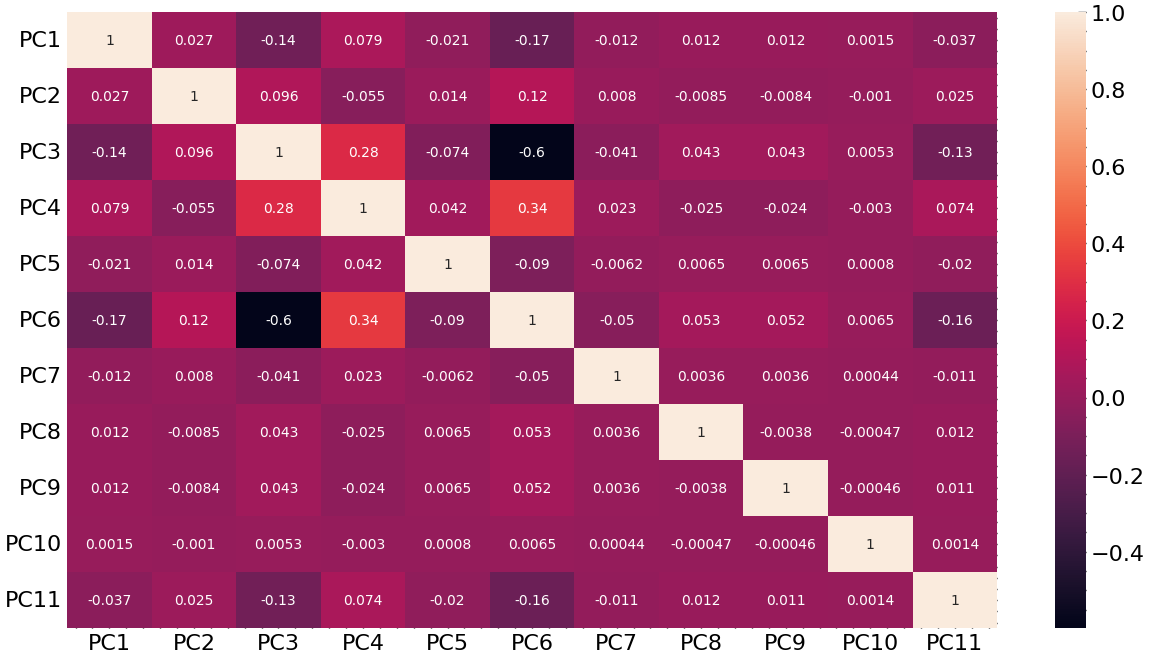

In [90]:
plt.figure(figsize=(15, 8))
sns.heatmap(loadings_df.corr(), annot = True)

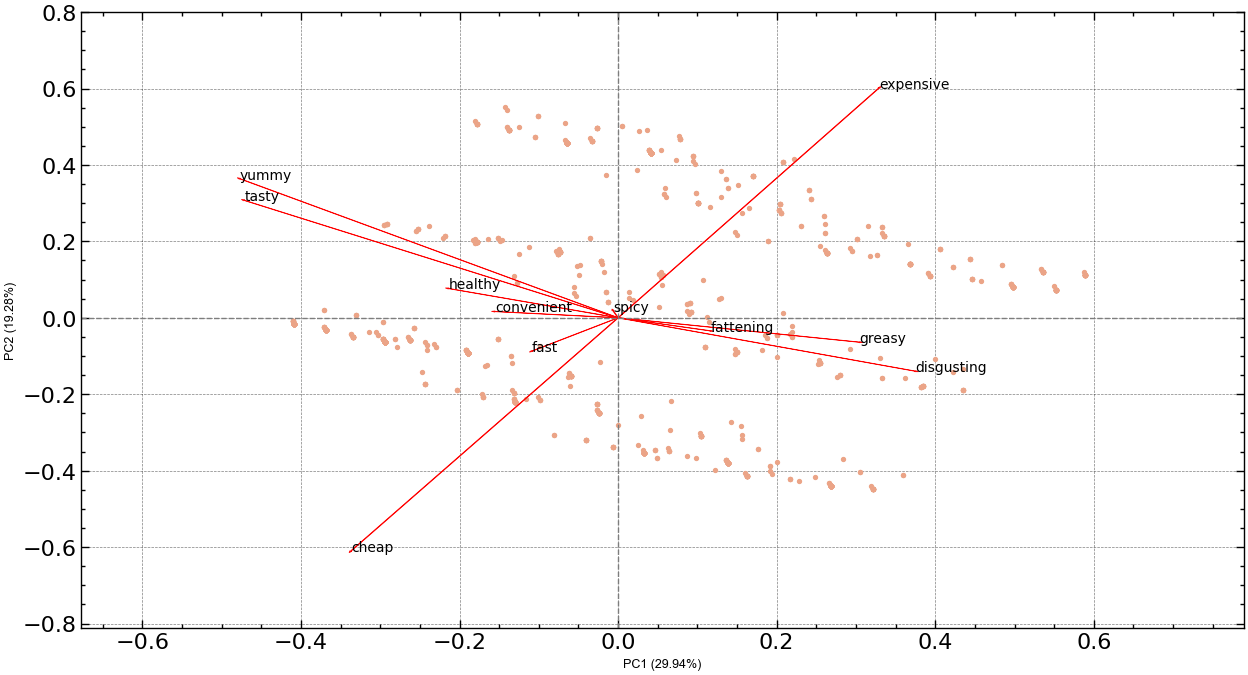

In [91]:
# get 2D biplot
cluster.biplot(cscore=pca_data, loadings=pca.components_, labels=data.columns.values, 
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
               dotsize = 8, var2=round(pca.explained_variance_ratio_[1]*100, 2),
               arrowcolor="red",
               show=True,dim=(15,8))

## Step : Using Kmeans clustering algorithm
We calculate solutions for two to eight market segments using standard k-means analysis. then we use thew **Elbow method**  and the **Silhoutte Score** to select the best value for the `k`.
We extract between two and eight segments because we do not know in advance what the best number of market segments is. If we calculate a range of solutions, we can compare them and choose the one which extracts segments containing similar consumers which are distinctly different from members of other segments.

In [92]:
from sklearn.cluster import KMeans # Import KMeans package
from sklearn.metrics import silhouette_score # Import silhouette_score package

In [93]:
k_vals = range(2, 8) # Create a range of k values
inertias = [] # Create an empty list to store the inertia values
silhoutte_scores = [] # Create an empty list to store the silhouette scores

for k_val in k_vals:
    kmeans = KMeans(n_clusters=k_val, n_init="auto") # Create a KMeans object with k clusters
    kmeans.fit(data) # Fit the data to the KMeans object 
    inertias.append(kmeans.inertia_) # Append the inertia to the list

    slht_score = silhouette_score(data, kmeans.labels_) # Calculate the silhouette score
    silhoutte_scores.append(slht_score) # Append the silhouette score to the list

Text(0.5, 1.0, 'Elbow Method and Silhouette Score')

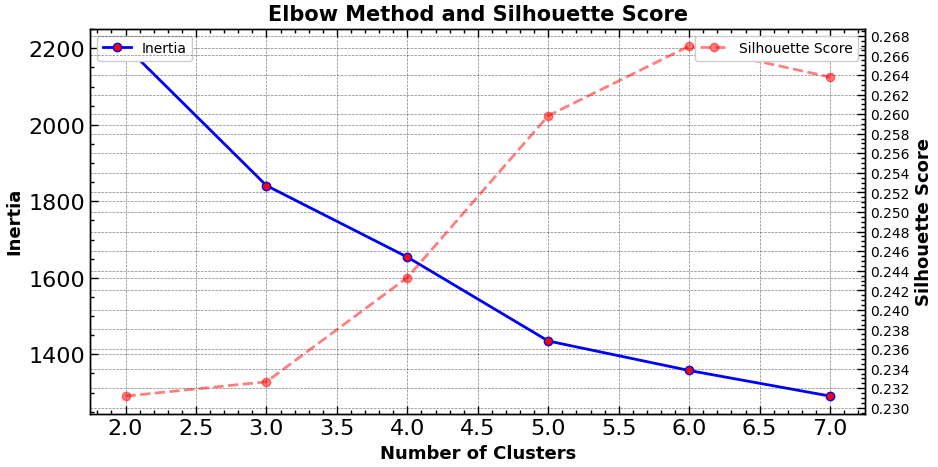

In [94]:
# Plot the elbow method results on the left side and the silhoutte score on the right side of a twin plot
fig, ax = plt.subplots(1, figsize=(10, 5))
ax1 = ax.twinx()

ax.plot(k_vals, inertias, marker="o", color="blue", label="Inertia", linestyle="-", alpha=1, markerfacecolor="red")
ax1.plot(k_vals, silhoutte_scores, marker="o", color="red", label="Silhouette Score", linestyle="--", alpha=0.5)

ax.set_xlabel("Number of Clusters", fontsize=13, fontweight="bold")
ax.set_ylabel("Inertia", fontsize=13, fontweight="bold")
ax1.set_ylabel("Silhouette Score", fontsize=13, fontweight="bold")

ax.legend(loc="upper left", fontsize=10)
ax1.legend(loc="upper right", fontsize=10)

# Set the right hand side yticks as 10 fontsize
ax1.tick_params(axis="y", labelsize=10)

plt.locator_params(axis="both", nbins = 20)
plt.title("Elbow Method and Silhouette Score", fontsize=15, fontweight="bold")

**Best Elbow is at about k=4**

In [95]:
## Apply the Kmeans
kmeans = KMeans(n_clusters=4, n_init="auto")
kmeans.fit(data)

# Create a datfarame with the cluster labels and the data
df_clustered = data.copy() # Create a copy of the data
df_clustered["Cluster"] = kmeans.labels_ # Add the cluster labels to the data

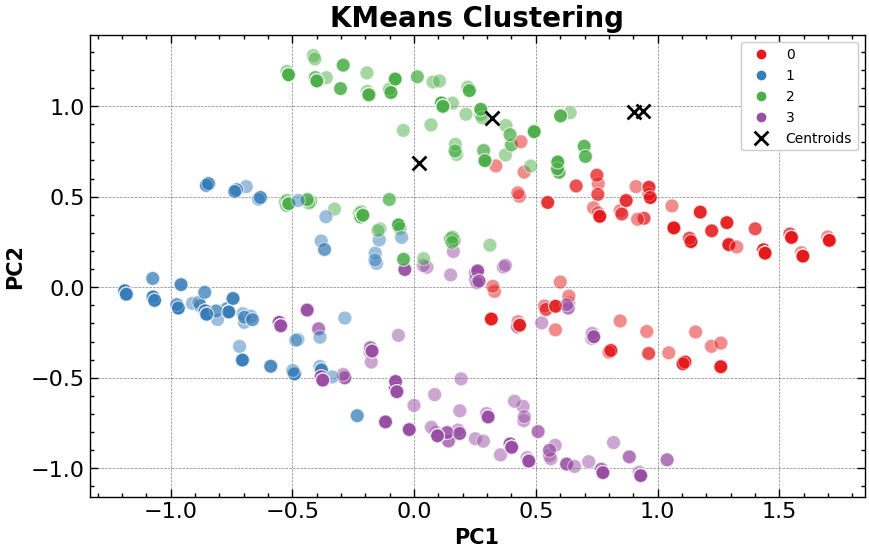

In [96]:
# Plot the PC1 and PC2 with the colors as labels and label the classes
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x = pca_df["PC1"], y = pca_df["PC2"], hue = df_clustered["Cluster"], palette = "Set1", s = 100, alpha = 0.5)

plt.xlabel("PC1", fontsize = 15, fontweight = "bold")
plt.ylabel("PC2", fontsize = 15, fontweight = "bold")
plt.title("KMeans Clustering", fontsize = 20, fontweight = "bold")

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = "black", s = 100, alpha = 1, marker="x", label = "Centroids")
plt.legend(loc = "best", fontsize = 10)

## Step 7: Describing Segments
The fast food data set is not typical for data collected for market segmentation analysis because it contains very few descriptor variables. Descriptor variables – additional pieces of information about consumers – are critically important to gaining a good understanding of market segments. One descriptor variable available in the fast food data set is the extent to which consumers love or hate McDonald’s. Using a simple mosaic plot, we can visualise the association between segment membership and loving or hating McDonald’s.

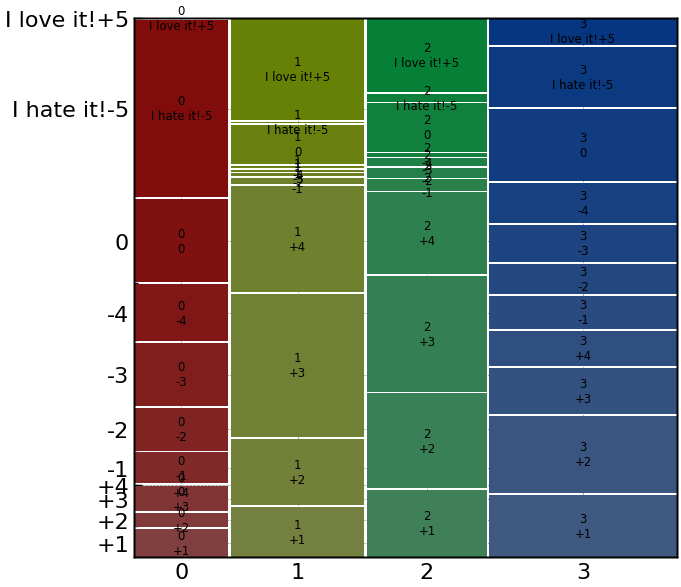

Like,+1,+2,+3,+4,-1,-2,-3,-4,0,I hate it!-5,I love it!+5
cluster_num,,,,,,,,,,,
0,14,7,12,0,15,21,31,28,41,87,0
1,35,46,100,74,4,2,1,2,27,1,71
2,42,59,72,51,7,6,5,2,30,5,46
3,61,75,45,35,32,30,36,39,71,59,26


None

In [97]:
# crosstab creation
data_mosaic = data_original.copy()
data_mosaic['cluster_num'] = kmeans.labels_
crosstab = pd.crosstab(data_mosaic['cluster_num'], data_mosaic['Like'])

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,7)
mosaic(crosstab.stack())
display(crosstab, plt.show())

The mosaic plot plots segment number along the x-axis, and loving or hating McDonald’s along the y-axis. The mosaic plot reveals a strong and significant association between those two variables. Members of segment 1 (depicted in the first column) rarely express love for McDonald’s, as indicated by the top left boxes being coloured in red. In stark contrast, members of segment 4 are significantly more likely to love McDonald’s (as indicated by the dark blue boxes in the top right of the mosaic plot). At the same time, these consumers are less likely to hate McDonald’s (as indicated by the very small red boxes at the bottom right of the plot). Members of segment 2 appear to have the strongest negative feelings towards McDonald’s; their likelihood of hating McDonald’s is extremely high and nearly none of the consumers in this segment love McDonald’s

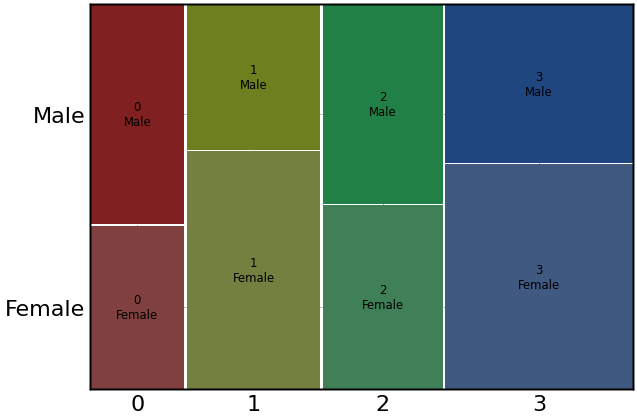

Like,+1,+2,+3,+4,-1,-2,-3,-4,0,I hate it!-5,I love it!+5
cluster_num,,,,,,,,,,,
0,14,7,12,0,15,21,31,28,41,87,0
1,35,46,100,74,4,2,1,2,27,1,71
2,42,59,72,51,7,6,5,2,30,5,46
3,61,75,45,35,32,30,36,39,71,59,26


None

In [98]:
# crosstab creation
crosstab_gender = pd.crosstab(data_mosaic['cluster_num'],data_mosaic['Gender'])
crosstab_gender

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
display(crosstab, plt.show())

We see immediately that the notches do not overlap, suggesting significant differences in average age across segments. A more detailed inspection reveals that members of segment 3 – consumers who think McDonald’s is yummy and tasty, but expensive – are younger than the members of all other segments. The parallel box-and- whisker plot shows this by (1) the box being in lower position; and (2) the notch in the middle of the box being lower and not overlapping with the notches of the other boxes.

Text(0.5, 1.0, "Box plot for 'Age'")

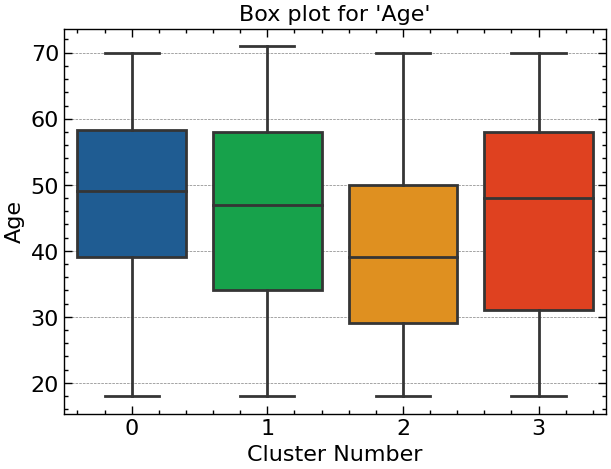

In [99]:
# box plot for 'Age'
sns.boxplot(x="cluster_num", y="Age", data=data_mosaic);
plt.xlabel("Cluster Number")
plt.title("Box plot for 'Age'")

## Step 8: Selecting (the) Target Segment(s)
Using the knock-out criteria and segment attractiveness criteria specified in Step 2, users of the market segmentation (McDonald’s managers) can now proceed to develop a segment evaluation plot.
The segment evaluation plot in the following figure is extremely simplified because only a small number of descriptor variables are available for the fast food data set.

 In the following figure the frequency of visiting McDonald’s is plotted along the x-axis. The extent of liking or hating McDonald’s is plotted along the y-axis. The bubble size represents the percentage of female consumers.

In [100]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [101]:
target_segment_data = data_original.copy()
target_segment_data["Cluster_num"] = kmeans.labels_

In [137]:
target_segment_data["Like"] = encoder.fit_transform(target_segment_data[["Like"]])
target_segment_data["VisitFrequency"] = encoder.fit_transform(target_segment_data[["VisitFrequency"]])
gender_data = target_segment_data.groupby("Cluster_num")["Gender"].value_counts().sort_index().unstack()

Text(0.5, 1.0, 'Target Segment')

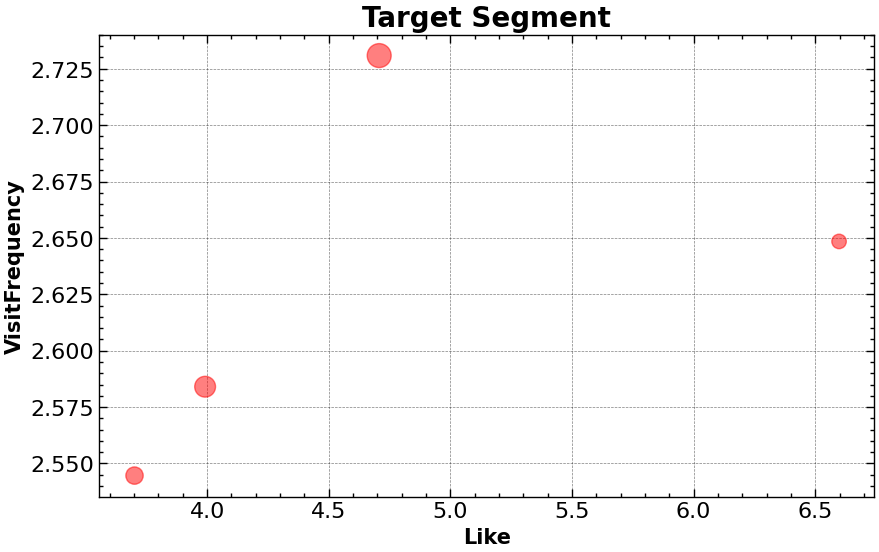

In [138]:
x_pts = target_segment_data.groupby("Cluster_num")["Like"].mean()
y_pts = target_segment_data.groupby("Cluster_num")["VisitFrequency"].mean()

plt.figure(figsize=(10, 6))
sizes = gender_data["Female"]
plt.scatter(x_pts, y_pts, s=sizes, c="red", alpha=0.5)
plt.xlabel("Like", fontsize=15, fontweight="bold")
plt.ylabel("VisitFrequency", fontsize=15, fontweight="bold")
plt.title("Target Segment", fontsize=20, fontweight="bold")